<a href="https://colab.research.google.com/github/Richish/hands_on_ml/blob/master/4_model_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Normal equation

θ = (XTX)^(-1) ((X)T * y)

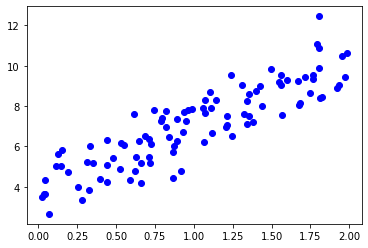

In [1]:
# lets try to generate linear looking data to test the above equation

import numpy as np
X = 2 * np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)

import matplotlib.pyplot as plt
plt.plot(X,y, 'ob')

In [2]:
# adding x0 = 1 to each X(for thete(0)X(0) term)
X_b = np.c_[np.ones((100,1)), X]
X_b

array([[1.        , 1.80643341],
       [1.        , 0.98647359],
       [1.        , 1.32371688],
       [1.        , 0.32838649],
       [1.        , 1.07439219],
       [1.        , 0.03991206],
       [1.        , 1.80399249],
       [1.        , 0.28289591],
       [1.        , 1.35305244],
       [1.        , 0.79109122],
       [1.        , 0.65953584],
       [1.        , 0.87095677],
       [1.        , 1.20482855],
       [1.        , 1.79226457],
       [1.        , 1.82618152],
       [1.        , 0.44193905],
       [1.        , 0.02489949],
       [1.        , 1.71409762],
       [1.        , 1.54666192],
       [1.        , 1.98214524],
       [1.        , 1.21399283],
       [1.        , 0.8662508 ],
       [1.        , 1.43785741],
       [1.        , 0.44489869],
       [1.        , 0.71474653],
       [1.        , 0.89407213],
       [1.        , 0.83916209],
       [1.        , 1.11720126],
       [1.        , 0.71140386],
       [1.        , 0.71748217],
       [1.

In [3]:
# 3 finding optimal theta

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T.dot(y))
theta_best

array([[3.86274001],
       [3.17889585]])

In [4]:
theta_best.shape

(2, 1)

In [5]:
# making predictions using this theta

#let new X:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]

y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.86274001],
       [10.22053171]])

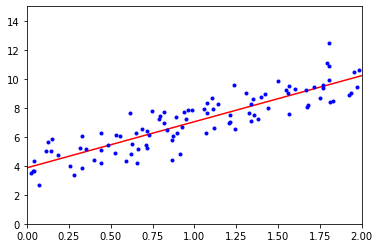

In [6]:
# plotting model's predictions

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")

plt.axis([0, 2, 0, 15])
plt.show()


## Linear regression using sklearn

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
dir(lin_reg)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_residues',
 '_set_intercept',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [8]:
lin_reg.intercept_, lin_reg.coef_

(array([3.86274001]), array([[3.17889585]]))

In [9]:
lin_reg.predict(X_new)

array([[ 3.86274001],
       [10.22053171]])

The LinearRegression class is based on the scipy.linalg.lstsq() function (the
name stands for “least squares”), which you could call directly:

In [10]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd, residuals, rank, s

(array([[3.86274001],
        [3.17889585]]),
 array([89.48775571]),
 2,
 array([14.71284416,  3.76126522]))

np.linalg.lstsq calculated by dot product of pseudoinverse(moore-penrose inverse) of X with y.

pseudoinverse of any matrix can be calculated directly by using np.linalg.pinv()

In [11]:
np.linalg.pinv(X_b).dot(y)

array([[3.86274001],
       [3.17889585]])

The pseudoinverse itself is computed using a standard matrix factorization technique
called Singular Value Decomposition (SVD) that can decompose the training set
matrix X into the matrix multiplication of three matrices U Σ VT (see
numpy.linalg.svd()). The pseudoinverse is computed as X+ = VΣ+UT. To compute
the matrix Σ+, the algorithm takes Σ and sets to zero all values smaller than a tiny
threshold value, then it replaces all the non-zero values with their inverse, and finally
it transposes the resulting matrix. This approach is more efficient than computing the
Normal Equation, plus it handles edge cases nicely: indeed, the Normal Equation may
not work if the matrix XTX is not invertible (i.e., singular), such as if m < n or if some
features are redundant, but the pseudoinverse is always defined.

## computational complexity of normal equation

The Normal Equation computes the inverse of XT X, which is an (n + 1) × (n + 1)
matrix (where n is the number of features). The computational complexity of inverting
such a matrix is typically about O(n2.4) to O(n3) (depending on the implementation).
In other words, if you double the number of features, you multiply the computation
time by roughly 22.4 = 5.3 to 23 = 8.
The SVD approach used by Scikit-Learn’s LinearRegression class is about O(n2). If
you double the number of features, you multiply the computation time by roughly 4.

Both the Normal Equation and the SVD approach get very slow
when the number of features grows large (e.g., 100,000). On the
positive side, both are linear with regards to the number of instances
in the training set (they are O(m)), so they handle large training
sets efficiently, provided they can fit in memory.

Once the model is trained:
predictions are very fast: the computational complexity
is linear with regards to both the number of instances you want to make predictions
on and the number of features.

Now we look at different ways to train a Linear Regression model, better
suited for cases where there are a large number of features, or too many training
instances to fit in memory.

# Gradient descent

The general idea of Gradient Descent is to
tweak parameters iteratively in order to minimize a cost function.

2 main problems of gradient descent:


1.   Local minima
2.   Being on a Plateau and then thinking that reached minima.

MSE for linear regression is however devoid of these problems. Reason:

MSE cost function for a Linear Regression model happens to be a
convex function, which means that if you pick any two points on the curve, the line
segment joining them never crosses the curve. This implies that there are no local
minima, just one global minimum. It is also a continuous function with a slope that
never changes abruptly.4 These two facts have a great consequence: Gradient Descent
is guaranteed to approach arbitrarily close the global minimum (if you wait long
enough and if the learning rate is not too high).

MSE cost function for a Linear Regression is of the shape of a bowl, though the bowl can be elongated along various axes to different levels.

### When using Gradient Descent, you should ensure that all features
### have a similar scale (e.g., using Scikit-Learn’s StandardScaler
### class), or else it will take much longer to converge.


# Batch Gradient descent

To implement normal Gradient Descent(not batch), you need to compute the gradient of the cost function
with regards to each model parameter θj. In other words, you need to calculate
how much the cost function will change if you change θj just a little bit.

Whereas in batch gradient descent, we calculate all partial derivatives in in each step of gradient descent. That is in one go it looks over all the partial derivatives and all of training data. So it is very memory intensive.

Notice that this formula involves calculations over the full training
set X, at each Gradient Descent step! This is why the algorithm is
called Batch Gradient Descent: it uses the whole batch of training
data at every step (actually, Full Gradient Descent would probably
be a better name). As a result it is terribly slow on very large training
sets

However, Gradient Descent scales well with the number of
features; training a Linear Regression model when there are hundreds
of thousands of features is much faster using Gradient
Descent than using the Normal Equation or SVD decomposition.

∇(θ).MSE(θ) = (2/m)(X.T)(X.theta-y)

The gradient vector, noted ∇θMSE(θ), contains all the
partial derivatives of the cost function (one for each model parameter).

θ(next step) = θ − η∇(θ).MSE(θ)


### Implementation of batch gradient descent using numpy

In [12]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100 # number of training instances

theta = np.random.randn(2,1) # random initialization of theta

for iteration in range(n_iterations):
    gradient = (2/m) * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradient
theta

array([[3.86274001],
       [3.17889585]])

# Stochastic gradient descent

Looks ata only one training sample at each step, hence loss may bay be going up and down.

makes the algorithm much faster
since it has very little data to manipulate at every iteration. It also makes it possible to
train on huge training sets, since only one instance needs to be in memory at each
iteration

On the other hand, due to its stochastic (i.e., random) nature, this algorithm is much
less regular than Batch Gradient Descent: instead of gently decreasing until it reaches
the minimum, the cost function will bounce up and down, decreasing only on average.
Over time it will end up very close to the minimum, but once it gets there it will
continue to bounce around, never settling down.

When the cost function is very irregular (as in Figure 4-6), this can actually help the
algorithm jump out of local minima, so Stochastic Gradient Descent has a better
chance of finding the global minimum than Batch Gradient Descent does.
Therefore randomness is good to escape from local optima, but bad because it means
that the algorithm can never settle at the minimum. One solution to this dilemma is
to gradually reduce the learning rate.

The function that determines the learning rate at each
iteration is called the learning schedule.

In [13]:
# Stochastic Gradient Descent using a simple learning schedule:

n_epochs = 50
t0,t1=5,50

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    print(epoch)
    for i in range(m): # m is number of samples
        if i%10==0:
            #print(i)
            pass
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index+1] #redundant
        yi = y[random_index: random_index+1]
        #print(xi.shape, yi.shape, theta.shape)
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
theta

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


array([[3.87943198],
       [3.18817624]])

To perform Linear Regression using SGD with Scikit-Learn, you can use the SGDRe
gressor class, which defaults to optimizing the squared error cost function. The following
code runs for maximum 1000 epochs (max_iter=1000) or until the loss drops
by less than 1e-3 during one epoch (tol=1e-3), starting with a learning rate of 0.1
(eta0=0.1), using the default learning schedule (different from the preceding one),
and it does not use any regularization (penalty=None; more details on this shortly):
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

In [14]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel()) #ravel returns a flattened array
sgd_reg.intercept_, sgd_reg.coef_

(array([3.89458996]), array([3.2797589]))

# Polynomial Regression

can actually use a linear model to fit nonlinear data. A simple way to do this is to
add powers of each feature as new features, then train a linear model on this extended
set of features. This technique is called Polynomial Regression.

In [15]:
# ex:
m=100
X=6*np.random.rand(m,1)-3
y=0.5*(X**2) + (X) + (2 + np.random.randn(m, 1))

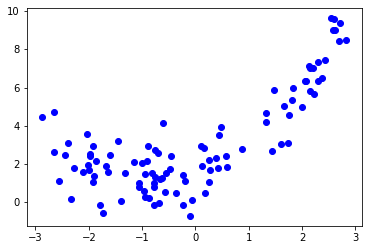

In [16]:
plt.plot(X,y, "bo")

In [17]:
# our data has one feature, but now we can introduce 1 more feature that represents the square of X
# Use sklearn's poly feature for this.
# final linear model will use these 2 features(1: original feature and 2: poly(square) feature derived from first feature)

from sklearn.preprocessing import PolynomialFeatures
poly_feature = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_feature.fit_transform(X)
X[0], X_poly[0]



(array([-0.94678222]), array([-0.94678222,  0.89639658]))

X_poly now contains the original feature of X plus the square of this feature. Now you
can fit a LinearRegression model to this extended training data

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.58739702]), array([[1.01913179, 0.5962631 ]]))

Note that when there are multiple features, Polynomial Regression is capable of finding
relationships between features (which is something a plain Linear Regression
model cannot do). This is made possible by the fact that PolynomialFeatures also
adds all combinations of features up to the given degree. For example, if there were
two features a and b, PolynomialFeatures with degree=3 would not only add the
features a2, a3, b2, and b3, but also the combinations ab, a2b, and ab2.

PolynomialFeatures(degree=d) transforms an array containing n
features into an array containing (n + d)!/(
d! n!) features, where n! is the
factorial of n, equal to 1 × 2 × 3 × ⋯ × n. Beware of the combinatorial
explosion of the number of features!

In [19]:
y_predict = lin_reg.predict(X_poly)
y_predict.shape

(100, 1)

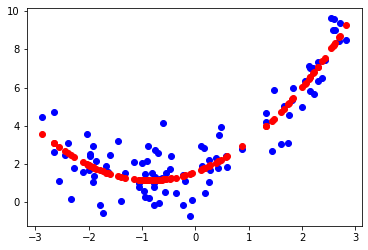

In [20]:
plt.plot(X, y, 'bo')
plt.plot(X, y_predict, 'ro')
plt.show()

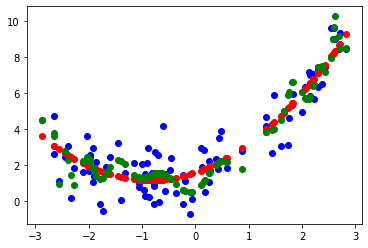

In [21]:
# trying a 30 degree(high degree) polynomial causes overfitting

poly_feature_h = PolynomialFeatures(degree=30, include_bias=False)
X_poly_h = poly_feature_h.fit_transform(X)

lin_reg_h = LinearRegression()
lin_reg_h.fit(X_poly_h, y)
lin_reg_h.intercept_, lin_reg_h.coef_

y_predict_h = lin_reg_h.predict(X_poly_h)

plt.plot(X, y, 'bo')
plt.plot(X, y_predict, 'ro')
plt.plot(X, y_predict_h, 'go')
plt.show()

# Learning Curves

how can you decide how complex your model should be? How can you tell
that your model is overfitting or underfitting the data?

1. Use cross-validation to get an estimate of a model’s generalization
performance. If a model performs well on the training data but generalizes poorly
according to the cross-validation metrics, then your model is overfitting. If it performs
poorly on both, then it is underfitting. This is one way to tell when a model is
too simple or too complex.

2. Use learning curves: these are plots of the model’s performance
on the training set and the validation set as a function of the training set size
(or the training iteration).

To generate the plots, simply train the model several times
on different sized subsets of the training set. The following code defines a function
that plots the learning curves of a model given some training data:

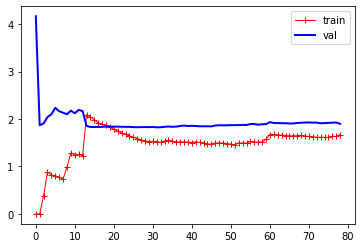

Training and val errors on last iteration 2.7959107213230663 3.6076424540550596


In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], [] 
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=1, label="train")
    plt.plot(np.sqrt(val_errors), "b", linewidth=2, label="val")
    plt.legend()
    plt.show()
    print("Training and val errors on last iteration",train_errors[-1], val_errors[-1])

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
    

These learning curves above are typical of an underfitting model. Both curves have reached
a plateau; they are close and fairly high.

If your model is underfitting the training data, adding more training
examples will not help. You need to use a more complex model
or come up with better features.

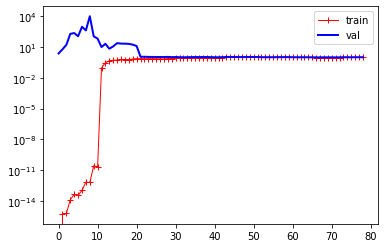

Training and val errors on last iteration 0.964992205823895 1.0430681472413754


In [23]:
# now lets see lerning curve for a 10 degree polynomial
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])
plt.yscale("log")
plot_learning_curves(polynomial_regression, X, y)

These learning curves above look a bit like the previous ones, but there are two very important
differences:
1. The error on the training data is much lower than with the Linear Regression
model.
2. There is a gap between the curves. This means that the model performs significantly
better on the training data than on the validation data, which is the hallmark
of an overfitting model. However, if you used a much larger training set,
the two curves would continue to get closer.

# Bias Variance tradeoff

1. Bias
This part of the generalization error is due to wrong assumptions, such as assuming
that the data is linear when it is actually quadratic. A high-bias model is most
likely to underfit the training data.10
2. Variance
This part is due to the model’s excessive sensitivity to small variations in the
training data. A model with many degrees of freedom (such as a high-degree polynomial
model) is likely to have high variance, and thus to overfit the training
data.
3. Irreducible error
This part is due to the noisiness of the data itself. The only way to reduce this
part of the error is to clean up the data (e.g., fix the data sources, such as broken
sensors, or detect and remove outliers).

Increasing a model’s complexity will typically increase its variance and reduce its bias.
Conversely, reducing a model’s complexity increases its bias and reduces its variance.
This is why it is called a tradeoff.

# Regularized linear models

a good way to reduce overfitting is to regularize the
model (i.e., to constrain it): the fewer degrees of freedom it has, the harder it will be
for it to overfit the data. For example, a simple way to regularize a polynomial model
is to reduce the number of polynomial degrees.

For a linear model, regularization is typically achieved by constraining the weights of
the model. We will now look at Ridge Regression, Lasso Regression, and Elastic Net,
which implement three different ways to constrain the weights.

## Ridge Regression

Ridge Regression (also called Tikhonov regularization) is a regularized version of Linear
Regression: a regularization term equal to α.Σ(subscript i=1, superscript n)(θ(subscript i))^2
is added to the cost function.

This forces the learning algorithm to not only fit the data but also keep the model
weights as small as possible. 

Note that the regularization term should only be added
to the cost function during training. Once the model is trained, you want to evaluate
the model’s performance using the unregularized performance measure.

J(theta) = MSE(theta) + regularization term
J(theta) = MSE(theta) + (alpha/2)*((summation from i=1 to n) of theta^2)

Note that the bias term θ0 is not regularized (the sum starts at i = 1, not 0). If we
define w as the vector of feature weights (θ1 to θn), then the regularization term is
simply equal to ½(∥ w ∥2)^2, where ∥ w ∥^2 represents the ℓ2 norm of the weight vector.12
For Gradient Descent, just add αw to the MSE gradient vector





It is quite common for the cost function used during training to be
different from the performance measure used for testing. Apart
from regularization, another reason why they might be different is
that a good training cost function should have optimizationfriendly
derivatives, while the performance measure used for testing
should be as close as possible to the final objective. A good
example of this is a classifier trained using a cost function such as
the log loss (discussed in a moment) but evaluated using precision/
recall.

It is important to scale the data (e.g., using a StandardScaler)
before performing Ridge Regression, as it is sensitive to the scale of
the input features. This is true of most regularized models.

Ridge regression can be performed either by closed form solution or by gradient descent.
Closed form equation is:
θ = (X.T.X + αA)^-1 .XT. y

In [24]:
# ridge regression using closed form in sklearn
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[4.92254141]])

In [25]:
# ridge regression using gradient descent and SGDRegressor class in sklearn
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.90379932])

In [26]:
# ridge regression using gradient descent and Ridge class in sklearn
ridge_reg = Ridge(alpha=1, solver="saga")
ridge_reg.fit(X, y.ravel())
ridge_reg.predict([[1.5]])

array([4.92219468])

## Lasso Regression
Least Absolute Shrinkage and Selection Operator Regression (simply called Lasso
Regression) is another regularized version of Linear Regression: just like Ridge
Regression, it adds a regularization term to the cost function, but it uses the ℓ1 norm
of the weight vector instead of half the square of the ℓ2 norm

Lasso Regression cost function
J(θ) = MSE(θ) + αΣ(i = 1 to n).θ(subscript i)

Here it is not square of θ(i). Just θ(i)

An important characteristic of Lasso Regression is that it tends to completely eliminate
the weights of the least important features (i.e., set them to zero).

In
other words, Lasso Regression automatically performs feature selection and outputs a
sparse model (i.e., with few nonzero feature weights).

In [27]:
## lasso regressor using Lasso class in sklearn
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.86950977])

In [28]:
## lasso regressor using SGDRegressor class in sklearn

sgd_reg = SGDRegressor(penalty="l1")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([4.90355287])

## Elastic Net
Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The
regularization term is a simple mix of both Ridge and Lasso’s regularization terms,
and you can control the mix ratio r. When r = 0, Elastic Net is equivalent to Ridge
Regression, and when r = 1, it is equivalent to Lasso Regression

J(theta) = MSE(theta) + r*(lasso term) + (1-r)*(ridge term).



In [29]:
# elastic net using sklearn
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.86544626])

## choosing which regularizer to use

Generally you should avoid plain Linear Regression. Ridge is a good
default, but if you suspect that only a few features are actually useful, you should prefer
Lasso or Elastic Net since they tend to reduce the useless features’ weights down to
zero.. In general, Elastic Net is preferred over Lasso since Lasso
may behave erratically when the number of features is greater than the number of
training instances or when several features are strongly correlated.

# Early stopping

In case of full batch gradient descent - just stop training as soon as the validation error reaches the minimum.

In case of Stochastic and Mini-batch Gradient Descent, stop only after the
validation error has been above the minimum for some time (when
you are confident that the model will not do any better), then roll
back the model parameters to the point where the validation error
was at a minimum.

In [30]:
# basic implementation of early stopping:
from sklearn.base import clone
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# prepping data

poly_scaler = Pipeline([
                       ("poly_features",PolynomialFeatures(degree=90, include_bias=False)),
                        ("std_scaler", StandardScaler())
])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)
X_train_poly_scaled.shape, X_val_poly_scaled.shape

sgd_clf = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error<minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

minimum_val_error, best_epoch, best_model

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

(10770387930.168156,
 864,
 SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
              eta0=0.01, fit_intercept=True, l1_ratio=0.15,
              learning_rate='invscaling', loss='squared_loss', max_iter=1000,
              n_iter_no_change=5, penalty='l1', power_t=0.25, random_state=None,
              shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
              warm_start=False))

In [31]:
minimum_val_error, best_epoch, best_model

(10770387930.168156,
 864,
 SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
              eta0=0.01, fit_intercept=True, l1_ratio=0.15,
              learning_rate='invscaling', loss='squared_loss', max_iter=1000,
              n_iter_no_change=5, penalty='l1', power_t=0.25, random_state=None,
              shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
              warm_start=False))

# Logistic regression

Classification using regression algorithms - using probabilities.

p = h(subscript theta)(x) = σ(x.T.θ)
The logistic—noted σ(·)—is a sigmoid function (i.e., S-shaped) that outputs a number
between 0 and 1. Logistic function
σ(t) = 1/(1 + exp(−t))

The score t is often called the logit: this name comes from the fact
that the logit function, defined as logit(p) = log(p / (1 - p)), is the
inverse of the logistic function. Indeed, if you compute the logit of
the estimated probability p, you will find that the result is t. The
logit is also called the log-odds, since it is the log of the ratio
between the estimated probability for the positive class and the
estimated probability for the negative class.

## Training and cost function

The objective of training is to set the parameter
vector θ so that the model estimates high probabilities for positive instances (y =
1) and low probabilities for negative instances (y = 0).

This idea is captured by the
cost function below for a single training instance x.
c(θ) =
{−log p if y = 1;
−log (1 − p) if y = 0)

This cost function makes sense because – log(t) grows very large when t approaches
0, so the cost will be large if the model estimates a probability close to 0 for a positive
instance, and it will also be very large if the model estimates a probability close to 1
for a negative instance. On the other hand, – log(t) is close to 0 when t is close to 1, so
the cost will be close to 0 if the estimated probability is close to 0 for a negative
instance or close to 1 for a positive instance,


The cost function over the whole training set is simply the average cost over all training
instances. It can be written in a single expression called
the log loss: 

The bad news is that there is no known closed-form equation to compute the value of
θ that minimizes this cost function (there is no equivalent of the Normal Equation).
But the good news is that this cost function is convex, so Gradient Descent (or any
other optimization algorithm) is guaranteed to find the global minimum (if the learning
rate is not too large and you wait long enough). The partial derivatives of the cost
function with regards to the jth model parameter θj is given by Equation

(∂/∂θj)
J(θ) = (1/m)
Σ(for i = 1 to m)
(σ(θTx^(i)) − y^(i)).x(subscript j)^(i)